## **3장 신경망 시작하기**

- **신경망이 가장 많이 사용되는 세 종류의 문제인 이진 분류, 다중 분류, 스칼라 값을 예측하는 회귀에 배운 것들을 적용한다.**

> - 영화 리뷰를 긍정 또는 부정으로 분류하기(이진 분류)

> - 신문 기사 토픽으로 분류하기(다중 분류)

> - 부동산 데이터를 바탕으로 주택가격을 예측하기(회귀)

## **3.1 신경망의 구조**

- 신경망 훈련에는 다음 요소들이 관련

> - 네트워크(또는 모델)를 구성하는 층

> - 입력 데이터와 그에 상응하는 타깃

> - 학습에 사용할 피드백 신호를 정의하는 손실 함수

> - 학습 진행 방식을 결정하는 옵티마이저

![test](./img/네트워크.jpg)

## **3.1.1 층: 딥러닝의 구성 단위**

- **신경망의 핵심적인 데이터 구조는 2장에서 소개한 층이다.**

> - 어떤 종류의 층은 상태가 없지만 대부분의 경우 가중치라는 층의 상태를 가진다.

> - 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 지식이 담겨 있다.

- **층마다 적절한 텐서 포맷과 데이터 처리 방식이 다르다.**

> - 예를 들어 (samples,features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터는 완전 연결층(fully connected layer)이나 밀집 층(dense layer)라 불리는 밀집 연결 층(densely connected layer)에 의해 처리되는 경우가 많다.

> - (samples, timesteps, feature) 크기의 3D 텐서로 저장된 시퀸스 데이터는 보통 LSTM같은 순환 층(recurrent layer)에 의해 처리된다.

> - 4D텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D합성곱 층(convolution layer)에 의해 처리된다.

- **케라스에서는 호환 가능한 층들을 엮어 데이터 변환 파이프라인(pipeline)을 구성함으로써 딥러닝 모델을 만든다.**

> - 여기에서 층 호환성은  각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환한다는 사실을 말한다.


In [1]:
from keras import layers

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# 32개의 유닛으로 된 밀집층
# 첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층을 만들었다.
# 배치 차원인 0번째 축은 지정하지 않기 때문에 어떤 배치 크기도 입력으로 받을 수 있다.
layer = layers.Dense(32, input_shape = (784,)) 

- **따라서 이 층에는 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 한다.**

> - **케라스에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞추어 주기 때문에 호환성을 걱정하지 않아도 된다.**

In [49]:
from keras import models

In [50]:
model = models.Sequential()
#첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층 -> 첫번 째 차원의 크기가 32로 변환된 텐서를 출력
model.add(layers.Dense(32,input_shape=(784,))) 
#두 번째 층에는 input_shape 매개변수를 지정하지 않았지만 
#그 대신 앞선 층의 출력 크기(32)를 입력의 크기로 자동으로 채택
model.add(layers.Dense(10))

## **3.1.2 모델: 층의 네트워크**

- **딥러닝 모델은 층으로 만든 비순환 유향 그래프 이다. 가장 일박적인 예가 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓는 것이다.**

> - 가지가 2개인 네트워크

> - 출력이 여러 개인 네트워크

> - 인셉션 블록

- **네트워크 구조는 가설 공간을 정의한다.**

> - 네트워크 구조를 선택함으로써 가능성 있는 공간(가설공간)을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한하게 된다.

> - 우리가 찾아야 할 것은 이런 텐서 연산에 포함된 가중치 텐서의 좋은 값이다.

- **신뢰할 만한 모범적인 사례와 원칙이 있지만 연습을 해야만 적절한 신경망을 설계할 수 있는 기술을 갖추게 될 것이다.**

## **3.1.3 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠**

- **네트워크 구조를 정의하고 나면 두 가지를 더 선택해야한다.**

> - 손실 함수: 훈련하는 동안 최소화될 값이다. 주어진 문제에 대한 성공 지표가 된다.

> - 옵티마이저: 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정한다. 특정 종류의 확률적 경사 하강법을 구현

- **여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있다. 하지만 경사 하강법 과정은 하나의 스칼라 손실값을 기준으로 한다.**

> - **따라서 손실이 여러 개인 네트워크에서는 모든 손실이 (평균을 내서) 하나의 스칼라 양으로 합쳐진다.**

- **문제에 맞는 올바른 목적 함수를 선택하는 것은 아주 중요하다.**

> - 우리가 만든 모든 신경망은 단지 손실 함수를 최소화하기만 한다는 것을 기억

- **올바른 손실 함수를 선택하는 간단한 지침**

> - 2개의 클래스가 있는 분류 문제에는 이진 크로스엔트로피

> - 여러 개의 클래스가 있는 분류 문제에는 범주형 크로스엔트로피

> - 회귀 문제에는 평균 제곱 오차

> - 시퀸스 학습 문제에는 CTC

> - 완전히 새로운 연구를 할 때만 독자적인 목적 함수를 만들게 된다.

## **3.2.2 케라스를 사용한 개발: 빠르게 둘러보기**

- **전형적인 케라스 작업 흐름**

> 1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의

> 2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의한다.

> 3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정한다.

> 4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출

- **모델을 정의하는 방법은 두 가지인데, Sequential 클래스(가장 자주 사용하는 구조인 층을 순서대로 쌓아 올리 네트워크) 또는 함수형 API(완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프)를 사용한다.**

### **모델 구조 정의**

In [51]:
from keras import models
from keras import layers

In [52]:
# Sequential
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

In [53]:
# 함수형 API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32,activation='relu')(input_tensor)
output_tensor = layers.Dense(10,activation='softmax')(x)

model = models.Model(inputs = input_tensor,outputs = output_tensor)

### **컴파일 단계**

- **컴파일 단계에서 학습 과정이 설정된다. 여기에서 모델이 사용할 옵티마이저와 손실 함수, 훈련 하는 동안 모니터링하기 위해 필요한 측정 지표를 설정한다.**

In [54]:
from keras import optimizers

In [55]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics = ['accuracy'])

### **fit()메서드**

- 마지막으로 입력 데이터의 넘파이 배열을 모델의 fit()메서드에 전달함으로써 학습 과정이 이루어진다. 

> - 이는 사이킷런이나 몇몇 다른 머신러닝 라이브러리에서 하는 방식과 비슷

In [56]:
#model.fit(input_tensor,target_tensor,batch_size=128, epochs=10)

## **3.4 영화 리뷰 분류: 이진 분류 예제**

**인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개로 이루어진 IMDB 데이터셋을 사용**

> **이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있다.**

**훈련 데이터와 테스트 데이터를 나누는 이유**

> **같은 데이터에서 머신 러닝 모델을 훈련하고 테스트해서는 절대 안 된다. 모델이 훈련 데이터에서 잘 작동한다는 것이 처음 만난 데이터에서도 잘 작동한다는 것을 보장하지 않는다. 중요한 것은 새로운 데이터에 대한 모델의 성능이다.**

**IMDB 데이터셋도 케라스에 포함되어 있는데 이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있다. 여기서 각 숫자는 사전에 있는 고유한 단어를 나타낸다.**

In [57]:
from keras.datasets import imdb

In [58]:
# num_words = 10000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미이다
# 즉, 드물게 나타나는 단어는 무시하겠다는 의미
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [53]:
#train_data[0] # 부정

In [54]:
#train_data[1] # 긍정

In [61]:
train_label[0]

1

In [62]:
# 가장 자주 등장하는 단어 1만 개로 제한했기 때문에 인덱스는 9,999를 넘지 않는다.
max([max(sequence) for sequence in train_data])

9999

In [63]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리

In [64]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [65]:
decoded_review = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [66]:
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

## **3.4.2 데이터 준비**

**신경망에 숫자 리스트를 주입할 수는 없으므로, 리스트를 텐서로 바꿔야한다.**

> 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (sample,sequence_length)크기의 정수 텐서로 변환한다 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫번째 층으로 사용한다.(Embedding층을 말하며, 나중에 자세히 다룬다.)

> 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환한다. 그리고 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용한다.

![test](./img/enumerage.png)

In [67]:
import numpy as np

In [68]:
def vectorize_sequence(sequences,dimension=10000):
    # 크기가 (len(sequences),dimension)인 0행렬을 생성
    results = np.zeros((len(sequences),dimension)) 
    for i, sequences in enumerate(sequences): # 각각의 단어를 인덱스와 단어 형태로 분리
        results[i,sequences] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

In [69]:
x_train = vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)

In [70]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [71]:
y_train = np.asarray(train_label).astype('float32') # 리스트 -> 배열 -> 자료형을 float32
y_test = np.asarray(test_label).astype('float32') # 리스트 -> 배열 -> 자료형을 float32

## **3.4.3 신경망 모델 만들기**

**입력 데이터가 벡터고 레이블은 스칼라(1또는 0)이다. 앞으로 볼 수 있는 문제 중 가장 간단한 예**

> - **이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결 층(즉 Dense(16,activation='relu'))을 그냥 쌓은 것이다.**

**Dense층에 전달한 매개변수(16)는 은닉 유닛(hidden unit)의 개수이다. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다.**

> - **16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension,16)이라는 뜻이다.**

> - **따라서 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영된다. 그리고 편향벡터 b를 더하고 relu 연산을 적용한다.**

**표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있다.**

> - **은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴으로 학습 할 수 있다.**

> - **즉, 훈련 데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴**

**Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요**

> - 얼마나 많은 층을 사용할 것인가? (여기선 16개의 은닉 유닛과 2개의 은닉층)

> - 각 층에 얼마나 많은 은닉 유닛을 둘 것인가? (현재 리뷰의 감정을 스칼라 값을 예측으로 출력하는 세 번째 층)

**중간에 있는 은닉 층은 활성화 함수로 relu를 사용하고 마지막 층은 확률(0과 1사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미한다.**

> - 출력을 위해 시그모이드 활성화 함수를 사용 (임의의 값을 0~1 사이로 압축하므로 출력 값을 확률처럼 사용)

>  ![test](./img/시그모이드.jpg)

> - relu는 음수를 0으로 만드는 함수이다.

>  ![test](./img/렐루.jpg)


In [72]:
from keras import models
from keras import layers

In [73]:
model = models.Sequential() # model 생성
# 입력을 10,000을 받는 16개의 은닉노드 생성 활성화 함수를 relu (1층)
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) 
# 입력을 16을 받는 16개의 은닉노드 생성 활성화 함수는 relu(2층)
model.add(layers.Dense(16,activation='relu'))
# 출력층으로 1개의 값으로 출력 활성화함수는 시그모이드 함수로 0 ~ 1사이의 값(확률)
model.add(layers.Dense(1,activation='sigmoid'))

**활성화 함수를 사용하는 이유**

> - relu와 같은 활성화 함수(또는 비선형 함수라고도 부른다)가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성된다. (output = dot(W,input)+b

> - **그러므로 이층은 입력에 대한 선형 변환(아핀 변환)만을 학습할 수 있다. 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변화의 집합이다. 이런 가설 공간은 매우 제약이 많으며, 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없다. 즉, 층을 추가해도 가서 공간이 확장되지 않는다.**

> - **따라서 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 한다. relu는 딥러닝에서 가장 인기 있는 활성화 함수이다.**

**마지막으로 손실 함수와 옵티마이저를 선택해야한다.**

> - 이진 분류 문제고 신경망의 출력이 확률이기 때문에 binary_crossentropy 손실이 적합하다. (mean_squared_error도 사용가능)

> - 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택이다. 

> - 크로스엔트로피는 정보 이론 분야에서 온 갠ㅁ으로 확률 분포 간의 차이를 측정한다. 여기에서는 원본 분포와 예측 분포 사이를 측정

**교차 엔트로피 오차**
- 또 다른 손실 함수로서 교차 엔트로피 오차도 자주 이용한다.
![test](./img/교차엔트로피오차.png)
- log는 밑이 e인 자연로그이다. y(k)는 신경망의 출력, t(k)는 정답레이블이다.
- 실질적으로 정답일 때의 추정 t(k)가 1일때만 자연로그의 계산식이 된다. 
> - 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

In [74]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

**케라스에 rmsprop, binary_crossentropy,accuracy가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능하다.**

> - 하지만 가끔씩 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있다.

In [75]:
from keras import optimizers

In [76]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

- **전자의 경우에는 위 코드와 같이 옵티마이저 파이썬 클래스를 사용해서 객체를 직접 만들어 optimizer 매개변수에 전달하면 된다.**

In [77]:
from keras import losses
from keras import metrics

In [78]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

- **후자의 경우 위 코드와 같이 loss와 metrics 매개변수에 함수 객체를 전달하면 된다.**

## **3.4.4 훈련 검증**

**훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어야 한다.**

In [79]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킨다. (x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복)**

**동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 측정할 것이다. 이렇게 하려면 validation_data 매개변수에 검증 데이터를 전달해야한다.**

**model.fit() 메서드는 History 객체를 반환한다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있다.**

In [80]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data= (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.5099 - acc: 0.7799 - val_loss: 0.3827 - val_acc: 0.8661
Epoch 2/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.3012 - acc: 0.9039 - val_loss: 0.2995 - val_acc: 0.8909
Epoch 3/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.2160 - acc: 0.9283 - val_loss: 0.3079 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1726 - acc: 0.9434 - val_loss: 0.2829 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.1393 - acc: 0.9554 - val_loss: 0.2849 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.1116 - acc: 0.9661 - val_loss: 0.3105 - val_acc: 0.8803
Epoch 7/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.0944 - acc: 0.9724 - val_loss: 0.3162 - 

In [81]:
history_dict = history.history

In [82]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [83]:
import matplotlib.pyplot as plt

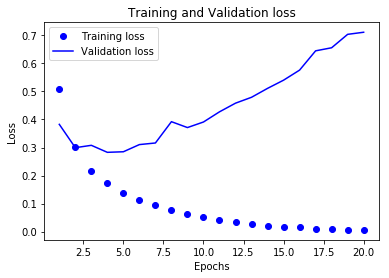

In [84]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

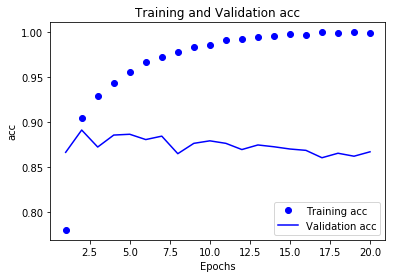

In [85]:
history_dict = history.history
loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training acc')
plt.plot(epochs,val_loss,'b',label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

**결과를 보면 훈련 데이터는 epochs을 반복할수록 정확도는 오르고 손실함수는 낮아지고 있는 경향을 보이지만 validation셋으로 검증한 결과는 반대로 epochs을 반복 할수록 정확도는 낮아지고 손실함수는 높아지는 경향을 보인다. 이를 과대적합(overfiting)이라 한다.**

> - **즉, 두 번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못한다.**

In [86]:
model = models.Sequential() # model 생성
# 입력을 10,000을 받는 16개의 은닉노드 생성 활성화 함수를 relu (1층)
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) 
# 입력을 16을 받는 16개의 은닉노드 생성 활성화 함수는 relu(2층)
model.add(layers.Dense(16,activation='relu'))
# 출력층으로 1개의 값으로 출력 활성화함수는 시그모이드 함수로 0 ~ 1사이의 값(확률)
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.4751 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.2656 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 3s 124us/step - loss: 0.1983 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 3s 135us/step


In [87]:
results # loss, acc

[0.322911081829071, 0.8732]

## **3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기** 

**모델을 훈련시킨 후 이를 실전 환경에서 사용하고 싶을 것이다. predict메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있다.**

**아래 결과를 보면 어떤 샘플에 대해 확신을 가지고 있지만 어떤 샘플에 대해서는 확신이 부족한 것을 볼 수 있다.**

In [88]:
model.predict(x_test)

array([[0.138467  ],
       [0.99969614],
       [0.30239242],
       ...,
       [0.07166852],
       [0.04341773],
       [0.47380707]], dtype=float32)

## **3.4.6 추가 실험**

> - 3개의 은닉 층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인

> - 층의 은닉 유닛을 추가 32개의 유닉

> - mse를 손실함수로 사용

> - relu 대신에 tanh 활성화 함수를 사용

In [89]:
model = models.Sequential() # model 생성
# 입력을 10,000을 받는 32개의 은닉노드 생성 활성화 함수를 tanh (1층)
model.add(layers.Dense(32,activation='tanh',input_shape=(10000,))) 
# 입력을 32을 받는 64개의 은닉노드 생성 활성화 함수는 tanh(2층)
model.add(layers.Dense(64,activation='tanh'))
# 입력을 32을 받는 개의 은닉노드 생성 활성화 함수는 tanh(3층)
model.add(layers.Dense(32,activation='tanh'))
# 출력층으로 1개의 값으로 출력 활성화함수는 시그모이드 함수로 0 ~ 1사이의 값(확률)
model.add(layers.Dense(1,activation='sigmoid'))

In [90]:
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data= (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.1487 - acc: 0.7854 - val_loss: 0.1009 - val_acc: 0.8613
Epoch 2/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.0696 - acc: 0.9077 - val_loss: 0.0976 - val_acc: 0.8714
Epoch 3/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.0499 - acc: 0.9365 - val_loss: 0.0982 - val_acc: 0.8698
Epoch 4/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0390 - acc: 0.9507 - val_loss: 0.0930 - val_acc: 0.8803
Epoch 5/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0347 - acc: 0.9557 - val_loss: 0.0963 - val_acc: 0.8796
Epoch 6/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.0271 - acc: 0.9675 - val_loss: 0.1010 - val_acc: 0.8762
Epoch 7/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0220 - acc: 0.9749 - val_loss: 0.1127 - 

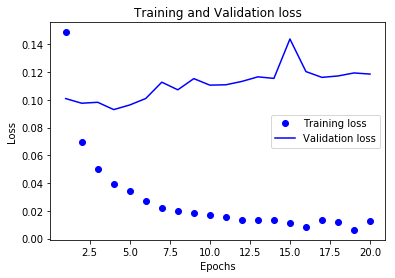

In [91]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

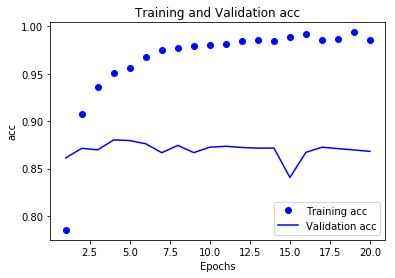

In [92]:
history_dict = history.history
loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training acc')
plt.plot(epochs,val_loss,'b',label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [93]:
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 4,
                   batch_size = 512,
                   validation_data= (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 236us/step - loss: 0.0152 - acc: 0.9831 - val_loss: 0.1354 - val_acc: 0.8541
Epoch 2/4
15000/15000 [==============================] - 3s 200us/step - loss: 0.0107 - acc: 0.9880 - val_loss: 0.1230 - val_acc: 0.8653
Epoch 3/4
15000/15000 [==============================] - 3s 205us/step - loss: 0.0058 - acc: 0.9941 - val_loss: 0.1245 - val_acc: 0.8642
Epoch 4/4
15000/15000 [==============================] - 3s 217us/step - loss: 0.0118 - acc: 0.9871 - val_loss: 0.1245 - val_acc: 0.8644


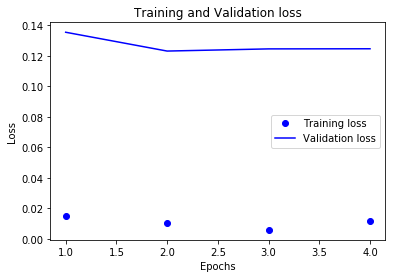

In [94]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

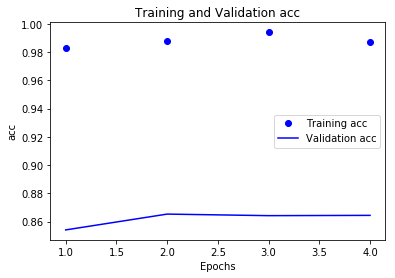

In [95]:
history_dict = history.history
loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training acc')
plt.plot(epochs,val_loss,'b',label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [96]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 140us/step


In [97]:
results

[0.1352280609703064, 0.8528]

In [98]:
model.predict(x_test)

array([[5.5524305e-04],
       [9.9988544e-01],
       [9.9822599e-01],
       ...,
       [1.3230514e-02],
       [4.5735366e-03],
       [8.4470481e-01]], dtype=float32)

## **3.4.7 정리**

> - 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요하다. 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있다.

> - relu 활성화 함수와 함께 Dense층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 앞으로도 자주 사용

> - (출력 클래스가 2개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를가진 Dense층으로 끝나야 한다. 이 신경망의 출력은 확률을 나타내는 0과 1사이의 스칼라 값이다.

> - 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy이다.

> - rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택이다. 걱정할 거리가 하나 줄은 셈

>- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 된다. 항상 훈련 세트 이외의 데이터에서 성능을 모니터링 해야한다.

## **3.5 뉴스 기사 분류: 다중 분류 문제**

**2개 이상의 클래스를 분류해야하는 경우**

**로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 본다.**

> - **클래스가 많기 때문에 이 문제는 다중 분류의 예이다.**

> - **각 데이터 포인트가 정확히 하나의 범주로 분류되기 때문에 좀 더 정확히 말하면 단일 레이블 다중 분류이다.**

> - **각 데이터 포인트가 여러 개의 범주에 속할 수 있다면 이것은 다중 레이블 다중 분류 문제가 된다.**

### **3.5.1 로이터 데이터셋**

**1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용한다.**

> - **이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋이다.**

> - **46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.**

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data) # 8982개의 훈련샘플

8982

In [4]:
len(test_data) # 2246개의 테스트 샘플

2246

In [5]:
#train_data[10] #각 샘플은 정수 리스트이다.(단어 인덱스)

In [6]:
word_index = reuters.get_word_index() # 단어 decoding

In [7]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [8]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [9]:
train_labels[0]

3

### **3.5.2 데이터 준비**

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences,dimension = 10000): # data_size, 자주 출현하는 단어 10000
    results = np.zeros((len(sequences),dimension)) # 동일한 크기의 0행렬
    for i, sequences in enumerate(sequences): # 각 단어 별 인덱스 부여
        results[i,sequences] = 1. # 각 데이터 마다 해당 단어의 인덱스 위치에 1을 추가
    return results

In [12]:
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

**레이블을 벡터로 바꾸는 방법은 두 가지이다.**

> - **레이블의 리스트를 정수 텐서로 변환하는 것**

> - **원-핫 인코딩을 사용하는 것 (원-핫 인코딩이 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고도 부른다.)**

In [13]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension)) # data_size(label), 46개의 토픽
    for i, label in enumerate(labels):
        results[i,label]= 1.
    return results

In [14]:
one_hot_train_label = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_label = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [15]:
one_hot_train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**MNIST 예제에서 이미 보았듯이 케라스에는 이를 위한 내장 함수가 있다.**

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### **3.5.3 모델 구성**

**이 토픽 분류 문제는 이전의 영화 리뷰 분류 문제와 비슷해 보인다. 두 경우 모두 짧은 텍스트를 분류하는 것이다. 하지만 이 예제에서는 출력 클래스의 개수가 2에서 46개로 늘어난 점이다. 즉, 출력 공간의 차원이 훨씬 커졌다.**

> - **즉, 출력 공간의 차원이 훨씬 커졌다.**

**이전에 사용했던 것처럼 Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다. 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 이를 복원할 방법이 없다. 각 층은 잠재점으로 정보의 병목이 될 수 있다. 이전 예제에서 16차원을 가진 중간층을 사용했지만 16차원 공간은 46개의 클래스를 구분하기에 너무 제약이 많다.**

> - **이렇게 규모가 작은 층은 유용한 정보를 완전히 잃게 되는 정보의 병목 지점 처럼 동작할 수 있다.**

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

**이 구조에서 주목해야 할 점**

> - **마지막 Dense 층의 크기가 46이다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻이다. 이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩된 것이다.**

> - **마지막 층에 softmax 활성화 함수가 사용되었다. 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력한다. 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률이다. 46개의 값을 모두 더하면 1이 된다.**

In [20]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

**이런 문제에 사용할 최선의 손실 함수는 categorical_crossentropy이다. 이 함수는 두 확률 분포 사이의 거리를 측정한다. 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 걸리이다. 두 분포사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 된다.**

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 233us/step - loss: 2.5318 - acc: 0.4955 - val_loss: 1.7219 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.4474 - acc: 0.6873 - val_loss: 1.3482 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 167us/step - loss: 1.0973 - acc: 0.7647 - val_loss: 1.1724 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.8711 - acc: 0.8160 - val_loss: 1.0829 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.7042 - acc: 0.8480 - val_loss: 0.9852 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.5683 - acc: 0.8785 - val_loss: 0.9408 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.4609 - acc: 0.9033 - val_loss: 0.9101 - val_acc: 0.8010


In [23]:
import matplotlib.pyplot as plt

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
epochs = range(1,len(loss)+1) #범위 1 ~ 21

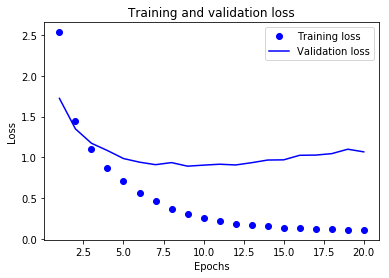

In [26]:
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

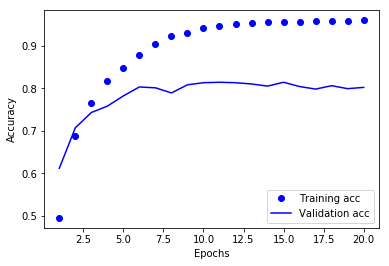

In [27]:
plt.clf() # 그래프를 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**이 모델은 아홉 번째 에포크 이후에 과대적합이 시작된다. 아홉 번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가한다.**

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [30]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 199us/step - loss: 2.5397 - acc: 0.5224 - val_loss: 1.6732 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 185us/step - loss: 1.3717 - acc: 0.7120 - val_loss: 1.2761 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 169us/step - loss: 1.0146 - acc: 0.7785 - val_loss: 1.1310 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.7984 - acc: 0.8250 - val_loss: 1.0539 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 168us/step - loss: 0.6398 - acc: 0.8627 - val_loss: 0.9745 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.5126 - acc: 0.8924 - val_loss: 0.9109 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.4125 - acc: 0.9139 - val_loss: 0.8942 - val_acc: 0.8210
Epoch 8

In [31]:
result = model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 222us/step


In [32]:
result

[1.0245664661098355, 0.7756010686194165]

### **3.5.5 새로운 데이터에 대해 예측하기**

**모델 객체의 predict 메서드는 46개의 토픽에 대한 확률 분포를 반환한다.**

In [33]:
predictions = model.predict(x_test)

In [34]:
predictions

array([[9.92889545e-06, 8.43919042e-05, 2.63503243e-05, ...,
        3.04871137e-05, 6.19939965e-06, 9.26615849e-06],
       [8.37760919e-04, 1.76184308e-02, 3.59245320e-03, ...,
        5.41315007e-04, 1.27670692e-05, 2.67552881e-04],
       [1.83642132e-03, 7.66875625e-01, 2.83250562e-03, ...,
        1.42582867e-04, 1.90512871e-03, 2.01267467e-04],
       ...,
       [1.12274993e-05, 2.09238933e-04, 4.07629559e-05, ...,
        8.86761700e-06, 1.13521623e-04, 1.17218315e-05],
       [1.51071139e-03, 1.35007888e-01, 4.07422613e-03, ...,
        5.74075209e-04, 8.28112243e-04, 4.02072590e-04],
       [9.03036853e-04, 5.44222474e-01, 1.94478384e-03, ...,
        5.07472359e-05, 4.80776158e-04, 1.89089973e-04]], dtype=float32)

In [35]:
predictions[0].shape # 각 항목은 길이가 46인 벡터

(46,)

In [36]:
np.sum(predictions[0]) # 이 벡터의 원소의 합은 1

0.99999976

In [37]:
np.argmax(predictions[0]) # 가장 큰 값이 예측 클래스가 된다.

3

### **3.5.6 레이블과 손실을 다루는 다른 방법**

**앞서 언급한 것처럼 레이블을 인코딩하는 다른 방법은 다음과 같이 정수 텐서로 변환하는 것이다.**

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [40]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

**이 방식을 사용하려면 손실 함수 하나만 바꾸면 된다.**

In [41]:
model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

**이 손실 함수는 인터페이스만 다를 뿐이고 수학적으로는 categorical_crossentropy와 동일**

### **3.5.7 충분히 큰 중간층을 두어야 하는 이유**

**마지막 출력이 46차원이기 때문에 충간층의 히든 유닛이 46개보다 많이 적어서는 안 된다. 46차원보다 훨씬 작은 중간층을 두면 정보의 병목이 어떻게 나타나는지 확인해 본다.**

In [49]:
model = models.Sequential()

In [50]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [52]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 282us/step - loss: 3.2003 - acc: 0.2647 - val_loss: 2.5804 - val_acc: 0.5290
Epoch 2/20
7982/7982 [==============================] - 2s 240us/step - loss: 2.0445 - acc: 0.5540 - val_loss: 1.8107 - val_acc: 0.5700
Epoch 3/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.5568 - acc: 0.5852 - val_loss: 1.6198 - val_acc: 0.5940
Epoch 4/20
7982/7982 [==============================] - 2s 247us/step - loss: 1.3576 - acc: 0.6290 - val_loss: 1.5305 - val_acc: 0.6340
Epoch 5/20
7982/7982 [==============================] - 2s 244us/step - loss: 1.2273 - acc: 0.6748 - val_loss: 1.4811 - val_acc: 0.6550
Epoch 6/20
7982/7982 [==============================] - 2s 228us/step - loss: 1.1128 - acc: 0.7159 - val_loss: 1.4323 - val_acc: 0.6900
Epoch 7/20
7982/7982 [==============================] - 2s 230us/step - loss: 0.9963 - acc: 0.7517 - val_loss: 1.4238 - val_acc: 0.6920


**검증 정확도의 최고 값은 약 72%로 7% 정도 감소되었다. 이러한 손실의 원인 대부분은 많은 정보(클래스 46개의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다.**

**이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했다.**

## **3.5.8 추가 실험**

In [77]:
model = models.Sequential()

In [78]:
model.add(layers.Dense(64, activation= 'tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(46, activation='softmax'))

In [79]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [80]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 305us/step - loss: 1.6466 - acc: 0.6233 - val_loss: 1.1925 - val_acc: 0.7140
Epoch 2/20
7982/7982 [==============================] - 2s 273us/step - loss: 0.8941 - acc: 0.7977 - val_loss: 0.9350 - val_acc: 0.7980
Epoch 3/20
7982/7982 [==============================] - 2s 245us/step - loss: 0.5644 - acc: 0.8695 - val_loss: 0.9319 - val_acc: 0.8030
Epoch 4/20
7982/7982 [==============================] - 2s 248us/step - loss: 0.3598 - acc: 0.9209 - val_loss: 0.9281 - val_acc: 0.8080
Epoch 5/20
7982/7982 [==============================] - 2s 243us/step - loss: 0.2549 - acc: 0.9415 - val_loss: 0.9485 - val_acc: 0.8080
Epoch 6/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.2051 - acc: 0.9501 - val_loss: 1.0249 - val_acc: 0.7810
Epoch 7/20
7982/7982 [==============================] - 2s 242us/step - loss: 0.1714 - acc: 0.9521 - val_loss: 1.0111 - val_acc: 0.8100


## **3.5.9 정리**

> - N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense층의 크기는 N이어야 한다.

> - 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 한다.

> - 이런 문제에는 항상 범주형 크로스엔트로피를 사용. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화한다.

> - 다중 분류에서 레이블을 다루는 두 가지 방법이 존재한다 (원핫인코딩, 정수인코딩)

> - 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 주의

## **3.6 주택 가격 예측: 회귀 문제**

**개별적인 레이블 대신 연속적인 값을 예측하는 회귀(regression)이다.**

> **예를 들어 기상 데이터가 주어졌을 때 내일 기온을 예측하거나, 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측**

## **3.6.1 보스턴 주택 가격 데이터셋**

**1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측한다.**

> **데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로, 102개의 테스트 샘플로 나뉘어져 있다. 입력 데이터에 있는 각 특성(feature)은 스케일이 서로 다르다.**

In [81]:
from keras.datasets import boston_housing

In [82]:
(train_data, train_targets), (test_data, test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [83]:
train_data.shape # 훈련 데이터 shape

(404, 13)

In [84]:
test_data.shape # 테스트 데이터 shape

(102, 13)

In [86]:
# train_targets # label

### **3.6.2 데이터 준비**

**상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다. 네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실히 학습을 더 어렵게 많든다.**

**이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것이다. 입력 데이터에 있는 각 특성에 대해서 특성의 평균을 빼고 표준 편차로 나눈다.**

In [89]:
mean = train_data.mean(axis=0) # 열을 기준으로 평균 
train_data -= mean # 모든 훈련 데이터에 평균을 뺀다.
std = train_data.std(axis=0) # 열을 기준으로 표준편차
train_data /= std # 평균을 뺀 값에서 표준편차로 나눠 줌

In [91]:
test_data -= mean
test_data /= std

**테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주목해야한다. 머신러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 된다.**

## **3.6.3 모델 구성**

**샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용한다.**

> **일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법이다.**

In [92]:
from keras import models
from keras import layers

In [93]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],))) # dataset의 feature
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1)) # 한 개의 예측값
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

**이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없다. 이것이 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성이다.**

> **마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습된다.**

> **mse는 평균 제곱 오차의 약어로 예측과 타깃 사이 거이의 제곱이다. 회귀 문제에서 널리 사용되는 손실함수 이다.**

> **훈련하는 동안 모니터링을 위해 새로운 지표인 평균 절대 오차(MAE)를 측정한다. 이는 예측과 타깃 사이 거리의 절댓값이다. 예를들어 이 예제에서 MAE가 0.5이면 예측이 평균적으로 500달러 정도 차이가 난다는 뜻이다.**

### **3.6.4 K-겹 검증을 사용한 훈련 검증**

**매개변수들을 조정하면서 모델을 평가하기 위해 이전 예제에서 했던 것처럼 데이터를 훈련 세트와 검증 세트로 나눈다.**

> - **이 경우 데이터 포인트가 많지 않기 때문에 검증 세트도 매우 작다.**

> - **결국 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라진다. 즉, 검증 세트의 분할에 대한 검증 점수의 분산이 높다.**

> - **이렇게 되면 신뢰 있는 모델 평가를 할 수 없다.**

**이런 상황에서 가장 좋은 방법은 K-겹 교차 검증을 사용하는 것이다. 데이터를 K개의 분할(즉, Fold)로 나누고, K개의 모델을 각각 만들어 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법이다.**

> - **모델의 검증 점수는 K개의 검증 점수 평균이 된다.**

In [94]:
import numpy as np

In [96]:
k = 4 # 4-fold
num_val_samples = len(train_data) // k # data셋을 4개로 나눔
num_epochs = 100 # 반복 수
all_scores = [] # MAE를 담을 리스트

In [99]:
for i in range(k): # K-Fold 반복수 
    print('처리중인 폴드 #',i) 
    # validation_set(train) 0: num_val_sample -> num_val_sample: 2*num_val_sample ....
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples] 
    # validation_set(target) 0: num_val_sample -> num_val_sample: 2*num_val_sample
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    # 1num_val_sample: -> :num_val_sample, 2num_val_sample: -> ... 
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]], axis = 0
    )
    # 1num_val_sample: -> :num_val_sample, 2num_val_sample: -> ...
    partial_train_target = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]], axis = 0
    )
    
    model = build_model() # Include keras compile
    model.fit(partial_train_data,partial_train_target,
             epochs = num_epochs, batch_size = 1, verbose = 0 ) 
    # verbos=0 train process print(x)
    
    val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0) # mse, mae
    all_scores.append(val_mae) # val_mae(검증셋 점수 리스트 추가)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [100]:
all_scores

[2.0624131294760373,
 2.2220882614060202,
 2.8754868200509853,
 2.3271886234236234]

In [101]:
np.mean(all_scores)

2.371794208589167

**검증 세트가 다르므로 확실히 검증 검수가 2.1에서 2.9까지 변화가 크다. 평균값(2.4)이 각각의 점수보다 훨씬 신뢰할 만하다. 이것이 K-겹 교차 검증의 핵심이다.**

**위 예제에서는 평균적으로 2400달러 정도 차이가 난다. 주택 가격 범위가 1만 달러에서 5만달러 사이인 것을 감안하면 비교적 큰 값이다.**

In [103]:
k = 4 # 4-fold
num_val_samples = len(train_data) // k # data셋을 4개로 나눔
num_epochs = 500 # 반복 수
all_mae_histories = [] # MAE를 담을 리스트

In [105]:
for i in range(k): # K-Fold 반복수 
    print('처리중인 폴드 #',i) 
    # validation_set(train) 0: num_val_sample -> num_val_sample: 2*num_val_sample ....
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples] 
    # validation_set(target) 0: num_val_sample -> num_val_sample: 2*num_val_sample
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    # 1num_val_sample: -> :num_val_sample, 2num_val_sample: -> ... 
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]], axis = 0
    )
    # 1num_val_sample: -> :num_val_sample, 2num_val_sample: -> ...
    partial_train_target = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]], axis = 0
    )
    
    model = build_model() # Include keras compile
    history = model.fit(partial_train_data,partial_train_target,
                       validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size = 1, verbose = 0) 
    # verbos=0 train process print(x)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


**모든 폴드에 대해 에포크의 MAE 점수 평균을 계산**

In [106]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [107]:
import matplotlib.pyplot as plt

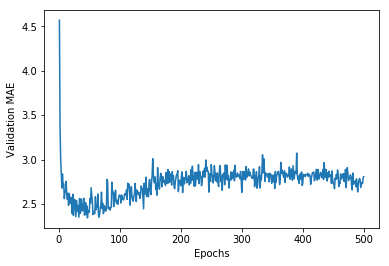

In [108]:
plt.plot(range(1,len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**이 그래프는 범위가 크고 변동이 심하기 떄문에 보기가 좀 어렵다.**

> **곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외시킨다.**

> **부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균(exponential moving average)으로 대체한다.**

In [110]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

In [111]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

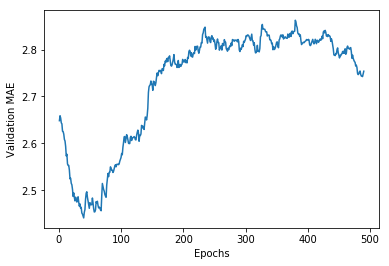

In [112]:
plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**이 그래프를 보면 검증 MAE가 80번째 에포크 이후에 줄어드는 것이 멈추었다. 이 지점 이후로는 과대적합이 시작된다.**

**모델의 여러 매개변수에 대한 튜닝이 끝나면(에포크 수뿐만 아니라 은닉 층의 크기도 조절할 수 있다.)**

In [113]:
model = build_model() # new compile model

In [114]:
model.fit(train_data, train_targets, # total train_set
         epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data,test_target)

102/102 [==============================] - 0s 2ms/step


In [115]:
test_mae_score # 아직 2,885달러 정도 차이가 난다.

2.8852784119400323

### **3.6.5 정리**

> - 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용한다. 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수이다.

> - 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다른다. 당연히 정확도 개념은 회귀에서 적용되지 않는다. 일반적인 회귀 지표는 평균 절대 오차(MAE)이다.

> - 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 한다.

> - 가용한 데이터가 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법이다.

> - 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋다.

### **3.7 요약**

> - **보통 원본 데이터를 신경망에 주입하기 전에 전처리해야 한다.**

> - **데이터의 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정해야 한다.**

> - **훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 새로운 데이터에 대해 나쁜 결과를 얻게 된다.**

> - **훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개 또는 2개의 은닉 층을 가진 신경망을 사용한다.**

> - **데이터가 많은 범주로 나뉘어 있을 때 중간층을 너무 작ㅇ면 정보의 병목이 생길 수 있다.**

> - **회귀는 분류와 다른 손실 함수와 평가 지표를 사용한다.**

> - **적은 데이터를 사용할 때는 K-겹 검증이 신뢰할 수 있는 모델 평가를 도와준다.**